
### Python Programming
##### by Narendra Allam
Copyright 2020
# Chapter 11

## Pandas & Matplotlib

#### Topics Covering
* Pandas
    * series<br>
        * Constructing from dictionaries<br>
        * Custom Index<br>
        * Data filtering<br>
    * Data Frames<br>
        * Constructing from a dictionary with values as lists<br>
        * Custom indexing<br>
        * Rearraning the coloumns<br>
        * Setting values<br>
        * Sum<br>
        * Cumulative sum<br>
        * Assigning a column to the dataframe<br>
        * Adding a new column<br>
        * Deleting a column<br>
        * Slicing<br>
        * Indexing and Advanced indexing<br>
        * Sorting<br>
        * Transposing<br>
        * Sort by<br>
        * Concatenate<br>
        * Merge<br>
        * Join<br>
        * Group By<br>
        * Data Munging<br>
            * Working Missing data<br>
        * Reading Data from CSV, Excel, JSON<br>
        * Writing Data to CSV, Excel, JSON<br>
* Matplotlib<br>
    * Basic Plotting<br>
    * mutiple plots<br>
    * labels<br>
    * legends<br>
    * styles
    * Bar charts
    * Histograms
    * Scatter Plots
    * box Plots
    * pie plots

#### Series
A Series is a one-dimensional array-like object containing an array of data, which can be any NumPy data type, and an associated array of data labels, functioning as its index.

In [ ]:
import pandas as pd

In [ ]:
S = pd.Series([36, 32, 45, 30, 25, 40, 42], dtype=float)
print(S)


In [ ]:
S.index

In [ ]:
S.values

In [ ]:
S[4]

In [ ]:
# custom indices
S = pd.Series([36, 32, 45, 30, 25, 40, 42], index=['Sunday', 'Monday',
                                                   'Tuesday', 'Wednessday',
                                                   'Thursday', 'Friday',
                                                   'Saturday'])
S

In [ ]:
S['Friday']

In [ ]:
# custom indices
# temps starting from 14th to 21st
S = pd.Series([36, 32, 45, 30, 25, 40, 42], index=range(14, 21))
S

In [ ]:
# checking data availability for indices
expected_dates = [11, 14, 16, 20, 18, 10, 7]

s1 = pd.Series(S, index=expected_dates)
s1

In [ ]:
None == None

In [ ]:
import numpy as np
np.nan == np.nan

In [ ]:
x = np.nan

x == np.nan

In [ ]:
np.isnan(s1[10])

In [ ]:
np.isnan(s1)

__Replace NaN with default room temperature(27)__

In [ ]:
s1[np.isnan(s1)] = 27
s1

Checking the value is 'nan:

In [ ]:
import math
import numpy
math.isnan(np.nan),np.isnan(np.nan) 

In [ ]:
print ('MAX=', s1.max())
print ('MIN=', s1.min())
print ('AVG=', s1.mean())
print ('STD=', s1.std())

In [ ]:
expected_dates = [11, 14, 16, 20, 18, 10, 7]

s1 = pd.Series(S, index=expected_dates)
s1

In [ ]:
s1.describe()

In [ ]:
s1.isnull()

In [ ]:
# considering 0s inplace of NaN
s1[s1.isnull()] = 0
s1

In [ ]:
s1.describe()

In [ ]:
s1

In [ ]:
s1 < 30

In [ ]:
s1[s1 > 30] = 555
s1

In [ ]:
# Custom Index
fruits = ['apples', 'oranges', 'cherries', 'pears', 'Mango']
quantities = [20, 33, 52, 10, 40]
S = pd.Series(quantities, index=fruits)
S

In [ ]:
S['Mango']

In [ ]:
# Scalar arithmatic
import numpy as np
print(S + 3)
print("======================")
print(S * 3)
print("======================")

In [ ]:
np.sin(S)

In [ ]:
S.apply(np.sin)

In [ ]:
def fun(x):
    return -1*x

S.apply(fun)

In [ ]:
# fruits with quantity morethan 30
S[S > 30] # filtering

In [ ]:
# Replacing the quantities greater than 30 with custom list of values
S[S > 30] = [30, 40, 50]
S

In [ ]:
# dictionary
cities = {"London":   8615246,
          "Berlin":   3562166, 
          "Madrid":   3165235, 
          "Rome":     2874038, 
          "Paris":    2273305, 
          "Vienna":   1805681, 
          "Bucharest":1803425, 
          "Hamburg":  1760433,
          "Budapest": 1754000,
          "Warsaw":   1740119,
          "Barcelona":1602386,
          "Munich":   1493900,
          "Milan":    1350680}

city_series = pd.Series(cities, dtype='uint32')
city_series

__All the cities with population greater than the average ?__

In [ ]:
 np.average(city_series)

In [ ]:
city_series > np.average(city_series)

In [ ]:
city_series[city_series > np.average(city_series)]

__All the cities with population < 1700000 and > 1300000?__

In [ ]:
city_series[(city_series < 1700000)  & (city_series > 1300000)]

In [ ]:
# List can be passed to index, if less elements in the list NaN will be assigned
my_cities = ["London", "Paris", "Zurich", "Berlin", 
             "Stuttgart", "Hamburg"]

my_city_series = pd.Series(city_series, index=my_cities)
my_city_series

In [ ]:
my_city_series.isnull()

In [ ]:
my_city_series[my_city_series.isnull()] = 1000000

In [ ]:
my_city_series

In [ ]:
city_series = pd.Series(my_city_series, dtype='uint64')
print(city_series)

In [ ]:
city_series[city_series.index.str.startswith('B')] = 999999

In [ ]:
city_series

In [ ]:
# converting dtype of exisiting series
s = pd.Series(city_series, dtype='uint32')
s

In [ ]:
my_city_series.describe()

#### np.nan is not zero

In [ ]:
s1 = pd.Series([1, np.nan, 2])
s2 = pd.Series([1, 0, 2])

In [ ]:
s1.describe()

In [ ]:
s2.describe()

# Dataframe

Dataframe
The underlying idea of a DataFrame is based on spreadsheets. We can see the data structure of a DataFrame as tabular and spreadsheet-like. It contains an ordered collection of columns. Each column consists of a unique data type, but different columns can have different types, e.g. the first column may consist of integers, while the second one consists of boolean values and so on.

A DataFrame has a row and column index; it's like a dict of Series with a common index.

In [ ]:
import pandas as pd
cities = {"city_name": ["London", "Berlin", "Madrid", "Rome", 
                   "Paris", "Vienna", "Bucharest", "Hamburg", 
                   "Budapest", "Warsaw", "Barcelona", 
                   "Munich", "Milan"],
          "population": [8615246, 3562166, 3165235, 2874038,
                         2273305, 1805681, 1803425, 1760433,
                         1754000, 1805681, 1602386, 1805681,
                         1350680],
          "country": ["England", "Germany", "Spain", "Italy",
                      "France", "Austria", "Romania", 
                      "Germany", "Hungary", "Poland", "Spain",
                      "Germany", "Italy"]}

city_frame = pd.DataFrame(cities)

city_frame

In [ ]:
city_frame.index

In [ ]:
city_frame.columns

In [ ]:
### Custom indexing
ordinals = ["first", "second", "third", "fourth",
            "fifth", "sixth", "seventh", "eigth",
            "ninth", "tenth", "eleventh", "twelvth",
            "thirteenth"]

city_frame = pd.DataFrame(cities, index=ordinals)
city_frame

In [ ]:
# Rearranging the Columns
city_frame = pd.DataFrame(city_frame,
                          columns=[ "country",
                                    "city_name", 
                                    "population"])
city_frame

In [ ]:
city_frame.rename(columns = {'city_name':'cityname'}, inplace=True)

In [ ]:
city_frame

In [ ]:
city_frame.rename(index = {'eigth':'EIGTH'}, inplace=True)

In [ ]:
city_frame

In [ ]:
city_frame.rename(index = {'EIGTH':'seventh'}, inplace=True)

In [ ]:
city_frame

In [ ]:
city_frame.groupby(city_frame.index).get_group('seventh')

In [ ]:
city_frame

In [ ]:
city_frame.rename(index = {'seventh': 'eigth'}, inplace=True)
city_frame

In [ ]:
# accessing a column
city_frame['cityname']

In [ ]:
# accessing a cell
city_frame['cityname']['seventh']

In [ ]:
city_frame['cityname']['sixth'] = 'Varanasi' # Do not

In [ ]:
city_frame

In [ ]:
# Alternate syntax
city_frame.cityname['sixth']

In [ ]:
city_frame.cityname.sixth

In [ ]:
city_frame

### Slicing and views
##### loc(), iloc()

In [ ]:
import pandas as pd
cities = {"cityname": ["London", "Berlin", "Madrid", "Rome", 
                   "Paris", "Vienna", "Bucharest", "Hamburg", 
                   "Budapest", "Warsaw", "Barcelona", 
                   "Munich", "Milan"],
          "population": [8615246, 3562166, 3165235, 2874038,
                         2273305, 1805681, 1803425, 1760433,
                         1754000, 1805681, 1602386, 1805681,
                         1350680],
          "country": ["England", "Germany", "Spain", "Italy",
                      "France", "Austria", "Romania", 
                      "Germany", "Hungary", "Poland", "Spain",
                      "Germany", "Italy"]}

ordinals = ["first", "second", "third", "fourth",
            "fifth", "sixth", "seventh", "eigth",
            "ninth", "tenth", "eleventh", "twelvth",
            "thirteenth"]

city_frame = pd.DataFrame(cities, index=ordinals, columns=['country',
                                                          'cityname',
                                                          'population'])

In [ ]:
city_frame

In [ ]:
city_frame.loc['third', 'country']

In [ ]:
city_frame.loc['third': 'eigth', 'country':'cityname']

In [ ]:
city_frame.loc['third': 'tenth', 'cityname':'country':-1]

In [ ]:
city_frame.loc['sixth']

In [ ]:
city_frame.loc['third': 'tenth' : 2, 'cityname':'country':-1]

Accessing Specific columns and rows

In [ ]:
city_frame.loc[['first', 'sixth', 'tenth'], ['country', 'population']]

In [ ]:
city_frame.loc['first':'fifth', ['country', 'population']]

In [ ]:
city_frame.loc['fifth':'first':-1, ['country', 'population']]

__iloc__

In [ ]:
city_frame.iloc[4::-1, [0, 2]]

In [ ]:
city_frame.iloc[2:9, :]

In [ ]:
city_frame

In [ ]:
city_frame.sum()

In [ ]:
city_frame['population'].sum()

In [ ]:
city_frame.all()

In [ ]:
# Cumulative sum
x = city_frame["population"].cumsum()
print(x)

#### Adding a new column

In [ ]:
import numpy as np
# Adding a new column
city_frame['area'] = np.nan

In [ ]:
city_frame

In [ ]:
area = [1572, 891.85, 605.77, 1285, 
        105.4, 414.6, 228, 755, 
        525.2, 517, 101.9, 310.4, 
        181.8]

city_frame["area"] = area

In [ ]:
city_frame

#### adding a row

In [ ]:
df = pd.DataFrame([['India', 'Hyderabad', 15000000, 700], 
                   ['Pakisthan', 'Hyderabad', 1000000, 60]], 
                  columns = ['country', 'cityname', 'population', 'area'],
                  index = ['fourteenth', 'fifteenth'])

In [ ]:
df

In [ ]:
city_frame = city_frame.append(df)

In [ ]:
city_frame

In [ ]:
city_frame.loc['fourteenth']

In [ ]:
city_frame['extra'] = np.nan

In [ ]:
city_frame

#### Deleting a column

In [ ]:
city_frame.pop('extra')

In [ ]:
city_frame

In [ ]:
city_frame.drop('area', axis=1)

In [ ]:
city_frame

In [ ]:
city_frame.drop('fourteenth')

In [ ]:
city_frame

In [ ]:
city_frame.drop(['fourteenth', 'thirteenth'])

__Permenently removing a row:__

In [ ]:
city_frame.drop('fourteenth', inplace=True)

In [ ]:
city_frame

__at(), iat()__

In [ ]:
city_frame.at['sixth', 'cityname'] = 'VIENNA'

In [ ]:
city_frame

In [ ]:
city_frame.iat[0, 2] = 8615246

In [ ]:
city_frame

#### Sorting

In [ ]:
import pandas as pd
cities = {"cityname": ["London", "Berlin", "Madrid", "Rome", 
                   "Paris", "Vienna", "Bucharest", "Hamburg", 
                   "Budapest", "Warsaw", "Barcelona", 
                   "Munich", "Milan", "Hyderabad", "Hyderabad"],
          "population": [8615246, 3562166, 3165235, 2874038,
                         2273305, 1805681, 1803425, 1760433,
                         1754000, 1805681, 1602386, 1805681,
                         1350680, 1500000, 800000],
          "country": ["England", "Germany", "Spain", "Italy",
                      "France", "Austria", "Romania", 
                      "Germany", "Hungary", "Poland", "Spain",
                      "Germany", "Italy", "India", "Pakisthan"],
          "area"    : [1572, 891.85, 605.77, 1285, 105.4, 414.6, 
                       228, 755, 525.2, 517, 101.9, 310.4, 181.8, 150, 75]
         }

ordinals = ["first", "second", "third", "fourth",
            "fifth", "sixth", "seventh", "eigth",
            "ninth", "tenth", "eleventh", "twelvth",
            "thirteenth", "fourteenth", "fifteenth"]

city_frame = pd.DataFrame(cities, index=ordinals)

city_frame

In [ ]:
city_frame.sort_values?

__Sorting DataFrame on column 'population':__

In [ ]:
city_frame = city_frame.sort_values("population", ascending=False)
city_frame

__Sorting DataFrame on multiple columns:__

In [ ]:
city_frame = city_frame.sort_values(["population", 'area'], ascending=False)
city_frame

In [ ]:
# Sorting DataFrame on multiple columns but different sorting orders
city_frame = city_frame.sort_values(['population', 'area'], ascending=[False, True])
city_frame

In [ ]:
city_frame.head()

In [ ]:
city_frame.tail()

In [ ]:
# A nested dictionary of dicts can be passed to a DataFrame as well. 
# The indices of the outer dictionary are taken as the the columns
# and the inner keys. i.e. the keys of the nested dictionaries,
# are used as the row indices:

growth = {"Switzerland": {"2010": 3.0, "2011": 1.8, "2012": 1.1, "2013": 1.9},
          "Germany": {"2010": 4.1, "2011": 3.6, "2012":	0.4, "2013": 0.1},
          "France": {"2010":2.0,  "2011":2.1, "2012": 0.3, "2013": 0.3},
          "Greece": {"2010":-5.4, "2011":-8.9, "2012":-6.6, "2013":	-3.3},
          "Italy": {"2010":1.7, "2011":	0.6, "2012":-2.3, "2013":-1.9}
          } 
growth_frame = pd.DataFrame(growth)
growth_frame

In [ ]:
# Transposing
growth_frame.T

In [ ]:
growth_frame

#### Querying
All the rows which are having population greater than 2 million

In [ ]:
city_frame['population'] > 2000000

In [ ]:
city_frame[city_frame['population'] > 2000000]

Filtering with mutlitple conditions using 
* and - &
* or - |

In [ ]:
city_frame[(city_frame['population'] > 2000000) & (city_frame['area'] < 1000)]

In [ ]:
city_frame[(city_frame['population'] < 2000000) | (city_frame['area'] > 1000)]

In [ ]:
city_frame

#### setting custom index from a column

In [ ]:
d = city_frame.set_index('cityname')
d

In [ ]:
d.loc['Warsaw']

In [ ]:
d.loc[['London', 'Hamburg']]

In [ ]:
d.loc['Hyderabad']

#### Multiple columns as index

In [ ]:
d1 = city_frame.set_index(['cityname', 'country'])
d1

In [ ]:
d1.loc[('Hyderabad', 'India')]

In [ ]:
d1.loc[[('Warsaw', 'Poland'), ('Milan', 'Italy')]]

In [ ]:
d1.sort_index(ascending=[True, False])

### Concatenate, Merge, Join
#### Concatenate

   The concat function (in the main pandas namespace) does all of the heavy lifting of performing concatenation
   
   operations along an axis while performing optional set logic (union or intersection) of the indexes (if any) on the other axes.
   
   Note that I say “if any” because there is only a single possible axis of concatenation for Series.
```python
pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, copy=True)
```

In [ ]:
import pandas as pd
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3'],
'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3']},
index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
'B': ['B4', 'B5', 'B6', 'B7'],
'C': ['C4', 'C5', 'C6', 'C7'],
'D': ['D4', 'D5', 'D6', 'D7']},
index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
'B': ['B8', 'B9', 'B10', 'B11'],
'C': ['C8', 'C9', 'C10', 'C11'],
'D': ['D8', 'D9', 'D10', 'D11']},
index=[8, 9, 10, 11])

df1

In [ ]:
df2

In [ ]:
df3

In [ ]:
frames = [df1, df2, df3]
result = pd.concat(frames)
result

In [ ]:
f1 = {'A', 'B', 'C', 'D'}
f2 = {'A', 'B', 'C', 'D'}
f3 = {'A', 'B', 'C', 'D'}
f1 | f2 | f3

In [ ]:
result = pd.concat(frames, axis=1)
result

In [ ]:
result['A']

In [ ]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3'],
'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3']},
index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
'B': ['B4', 'B5', 'B6', 'B7'],
'C': ['C4', 'C5', 'C6', 'C7'],
'F': ['D4', 'D5', 'D6', 'D7']},
index=[2, 3, 4, 5])


In [ ]:
df1

In [ ]:
df2

In [ ]:
df = pd.concat([df1, df2]) # default axis=0, join='outer'
df

In [ ]:
df = pd.concat([df1, df2], join='inner') # default axis=0, join='outer'
df

In [ ]:
df = pd.concat([df1, df2], join='outer', axis=0, sort=False)
df

In [ ]:
df = pd.concat([df1, df2], join='outer', axis=1, sort=False)
df

In [ ]:
df = pd.concat([df1, df2], join='inner', axis=0, sort=False)
df

In [ ]:
df = pd.concat([df1, df2], join='inner', axis=1, sort=False)
df

In [ ]:
f1 = {'A', 'B', 'C', 'D'}
f2 = {'A', 'B', 'C', 'F'}

f1 & f2

In [ ]:
_df1 = {0, 1, 2, 3}
_df2 = {2, 3, 4, 5}

_df1 & _df2

In [ ]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3'],
'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3']},
index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
'B': ['B4', 'B5', 'B6', 'B7'],
'C': ['C4', 'C5', 'C6', 'C7'],
'F': ['D4', 'D5', 'D6', 'D7']},
index=[2, 3, 4, 5])


In [ ]:

pd.concat([df1, df2],axis=0, join='outer', sort=False)

In [ ]:
df1

In [ ]:
df2

In [ ]:
pd.concat([df1, df2],axis=0, join='inner')

In [ ]:
df1 = {'A', 'B', 'C', 'D'}
df2 = {'A', 'B', 'C', 'F'}

df1 | df2

In [ ]:
df1 = {0, 1, 2, 3}
df2 = {2, 3, 4, 5}

df1 & df2

In [ ]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3'],
'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3']},
index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
'B': ['B4', 'B5', 'B6', 'B7'],
'C': ['C4', 'C5', 'C6', 'C7'],
'F': ['D4', 'D5', 'D6', 'D7']},
index=[2, 3, 4, 5])


In [ ]:
pd.concat([df1, df2],axis=1, join='inner')

In [ ]:
pd.concat([df1, df2],axis=0, join='inner', ignore_index=True)

#### MERGE
        pandas has full-featured, high performance in-memory join operations idiomatically very similar to relational databases like SQL. Users who are familiar with SQL but new to pandas might be interested in a comparison with SQL.
        pandas provides a single function, merge, as the entry point for all standard database join operations between DataFrame objects.
<b>Syntax</b>:
```python
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=True, suffixes=('_x', '_y'), copy=True, indicator=False)
```

In [ ]:
Table1
Name, dob, Income, employment

Table2
Name, dob, Height, Weight, Sugar, BP

Merge
(Name, dob), Income, employment, Height, Weight, Sugar, BP

In [ ]:
df1 = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
'key2': ['K0', 'K1', 'K0', 'K1'],
'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3']})

df2 = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
'key2': ['K0', 'K0', 'K0', 'K0'],
'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3']})

In [ ]:
df1

In [ ]:
(K0, K0) A0, B0, C0, D0
(K0, K1) A1, B1, NaN, NaN
(K1, K0) A2, B2, C1, D1
(K1, K0) A2, B2, C2, D2
(K2, K1) A3, B3, NaN, NaN

In [ ]:
df2

In [ ]:
pd.merge(df1, df2, how='outer', on=['key1', 'key2'])

In [ ]:
pd.merge(df1, df2, how='inner', on=['key1', 'key2'])

In [ ]:
df1

In [ ]:
df2

In [ ]:
df = pd.merge(df1, df2, how='left', on=['key1', 'key2'])
df

In [ ]:
df = pd.merge(df1, df2, how='right', on=['key1', 'key2'])
df

In [ ]:
result = pd.merge(df1, df2, how='inner', on='key1', suffixes=('_1', '_2'))
result

In [ ]:
result = pd.merge(df1, df2, on='key1', suffixes=('_df1', '_df2'))
result

#### JOIN
DataFrame.join is a convenient method for combining the columns 
of two potentially differently-indexed DataFrames into a single 
result DataFrame

In [ ]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
'B': ['B0', 'B1', 'B2']},
index=['K0', 'K1', 'K2'])

left

In [ ]:
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
'D': ['D0', 'D2', 'D3']},
index=['K0', 'K2', 'K3'])
right

In [ ]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
'B': ['B0', 'B1', 'B2']},
index=['K0', 'K1', 'K2'])

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
'D': ['D0', 'D2', 'D3']},
index=['K0', 'K2', 'K3'])

left.join(right, how='inner')


In [ ]:
left.join(right, how='outer')

In [ ]:
left.join(right, how='left')

In [ ]:
import pandas as pd
df = pd.DataFrame({ 'EmpId' :[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                    'Dept':   ['A', 'B', 'A', 'A', 'C', 'B', 'C', 'A', 'C', 'B'],
                    'Salary': [1.8,    5.2,   7.6,   3.5,   2.4,   5.7,   9.1,   1.9,   5.3,   3.7],
                    'Age': [34,    42,   24,   19,   57,   47,   32,   46,   32,   44]})
df

In [ ]:
df.sort_values('Dept')

In [ ]:
df.groupby('Dept').max()

In [ ]:
df.groupby('Dept')['Salary'].max()

In [ ]:
df.groupby('Dept')['EmpId'].count()

In [ ]:
df.groupby(['Dept', 'Age']).count()

#### Importing Exporting CSV, EXCEL

In [ ]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.random.randn(10, 5),
                  columns=['a', 'b', 'c', 'd', 'e'])
df

In [ ]:
df.to_csv('random_data.csv', sep=',', index=False)

In [ ]:
df = pd.read_csv('random_data.csv')
df

In [ ]:
pd.read_csv?

In [ ]:
df.to_excel('random_data.xlsx', sheet_name='first_sheet', index=False)

In [ ]:
pd.read_excel('random_data.xlsx', 'first_sheet')

In [ ]:
pd.read_excel('random_data.xlsx', 'first_sheet', usecols=[0, 2])

In [ ]:
import pandas as pd
pd.read_excel('random_data.xlsx', 'first_sheet', usecols=[0, 2, 4], skiprows=4, nrows=3)

In [ ]:
pd.read_excel?

In [ ]:
pd.read_excel('random_data.xlsx', 'first_sheet', converters={'b': bool})

In [ ]:
import pandas as pd
cfun = lambda x: str(x)

pd.read_excel('random_data.xlsx', 'first_sheet', converters={'b': cfun})

In [ ]:
!conda install -c anaconda mysql-python

__Writing data to sql databses(MySQL):__

In [ ]:
import numpy as np
import pandas as pd
import sqlalchemy # ORM
df = pd.DataFrame(np.random.randn(10, 5),
                  columns=['a', 'b', 'c', 'd', 'e'])
df

In [ ]:
engine = sqlalchemy.create_engine('mysql+mysqlconnector://naren:Python@7@localhost/test')
con = engine.connect()
df.to_sql('table2', con, index=False)
con.close()

__Reading data from sql databses(MySQL):__

_Reading SQL table:_

In [ ]:
import sqlalchemy
import pandas as pd
engine = sqlalchemy.create_engine('mysql+mysqlconnector://naren:Python@7@localhost/test')
con = engine.connect()
df = pd.read_sql_table('table1', con)
con.close()
df

_Running SQL query:_

In [ ]:
import sqlalchemy
import pandas as pd
engine = sqlalchemy.create_engine('mysql+mysqlconnector://naren:Python@7@localhost/test')
con = engine.connect()
df = pd.read_sql_query('select a, c, e from table1 limit 5', con)
con.close()
df

In [ ]:
import sqlalchemy
import pandas as pd
engine = sqlalchemy.create_engine('mysql+mysqlconnector://naren:Python@7@localhost/test')
con = engine.connect()
df = pd.read_sql('select a, c, e from table1 limit 5', con)
con.close()
df

#### Handling missing data

In [ ]:
import pandas as pd
df = pd.read_csv('random_data.csv')

In [ ]:
df = pd.DataFrame(np.random.randn(10, 5),
                  columns=['a', 'b', 'c', 'd', 'e'])
df
df['b'][4:7] = np.nan
df

In [ ]:
df.fillna(method='ffill')

In [ ]:
df.fillna(method='ffill', limit=2)

In [ ]:
df.fillna(method='bfill')

In [ ]:
df.fillna(df.mean())

## Matplotlib

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
# import seaborn as sns
# import bokeh as bk

# only for macbook retina
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

print (plt.style.available)
plt.style.use('seaborn-colorblind')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


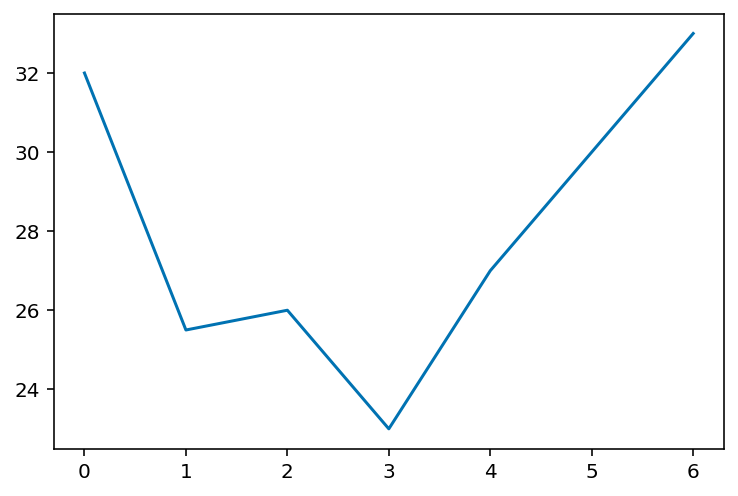

In [6]:
y = [32, 25.5, 26, 23, 27, 30, 33]
plt.plot(y)
plt.show()

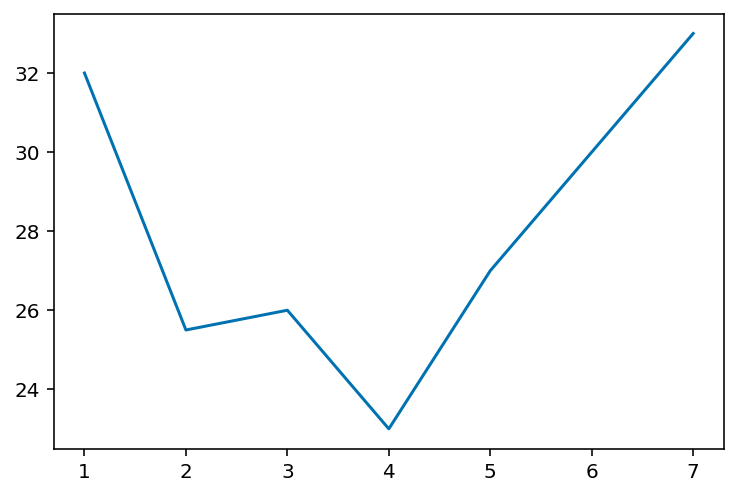

In [7]:
x = [1, 2, 3, 4, 5, 6, 7]
y = [32, 25.5, 26, 23, 27, 30, 33]
plt.plot(x, y)
plt.show()

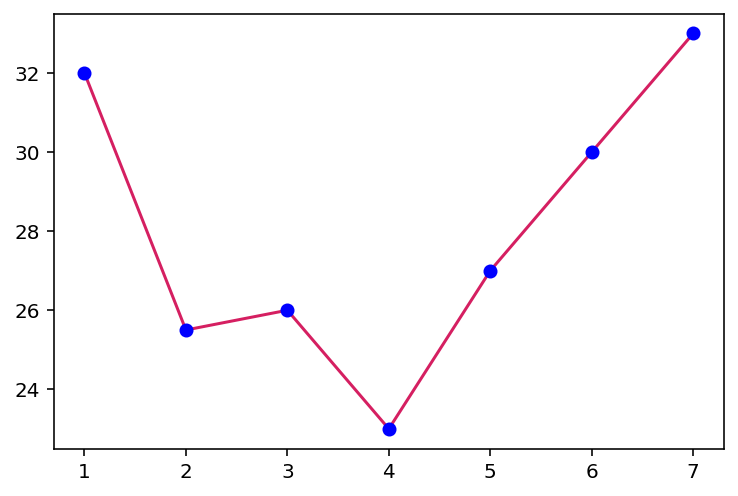

In [18]:
x = [1, 2, 3, 4, 5, 6, 7]
y = [32, 25.5, 26, 23, 27, 30, 33]
plt.plot(x, y, '-', color='#D51F61')
plt.plot(x, y, 'ob')
plt.show()

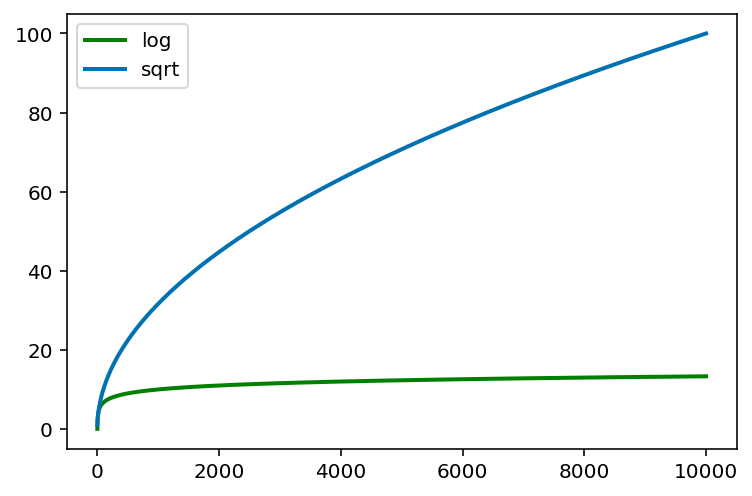

In [22]:
import matplotlib.pyplot as plt
from math import log, sqrt

x = range(1, 10000)
y1 = [log(i, 2) for i in x]
y2 = [sqrt(i) for i in x]

plt.plot(x, y1, '-g', label='log', linewidth=2)
plt.plot(x, y2, label= 'sqrt', linewidth=2)

plt.legend()
plt.show()

#### The format parameter of pyplot.plot

```python
=============================================
character       description
=============================================
'-'             solid line style
'--'            dashed line style
'-.'            dash-dot line style
':'             dotted line style
'.'             point marker
','             pixel marker
'o'             circle marker
'v'             triangle_down marker
'^'             triangle_up marker
'<'             triangle_left marker
'>'             triangle_right marker
'1'             tri_down marker
'2'             tri_up marker
'3'             tri_left marker
'4'             tri_right marker
's'             square marker
'p'             pentagon marker
'*'             star marker
'h'             hexagon1 marker
'H'             hexagon2 marker
'+'             plus marker
'x'             x marker
'D'             diamond marker
'd'             thin_diamond marker
'|'             vline marker
'_'             hline marker
===============================================
Colors:
==========  ========
'b'         blue
'g'         green
'r'         red
'c'         cyan
'm'         magenta
'y'         yellow
'k'         black
'w'         white
==========  ========
```

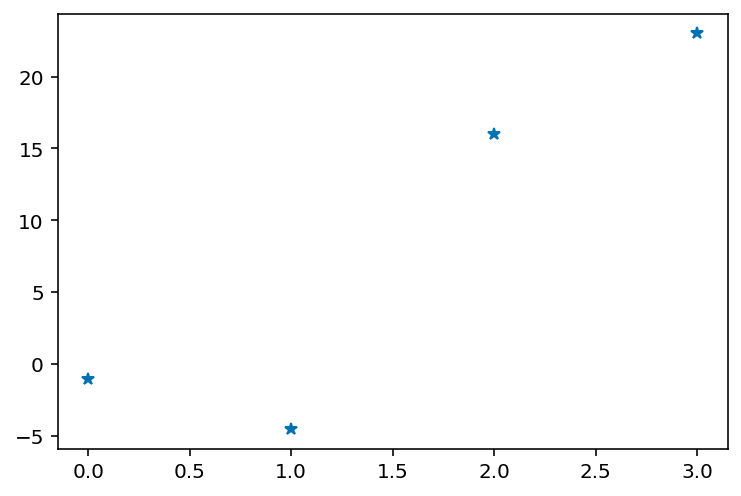

In [23]:
import matplotlib.pyplot as plt
plt.plot([-1, -4.5, 16, 23], "*")
plt.show()

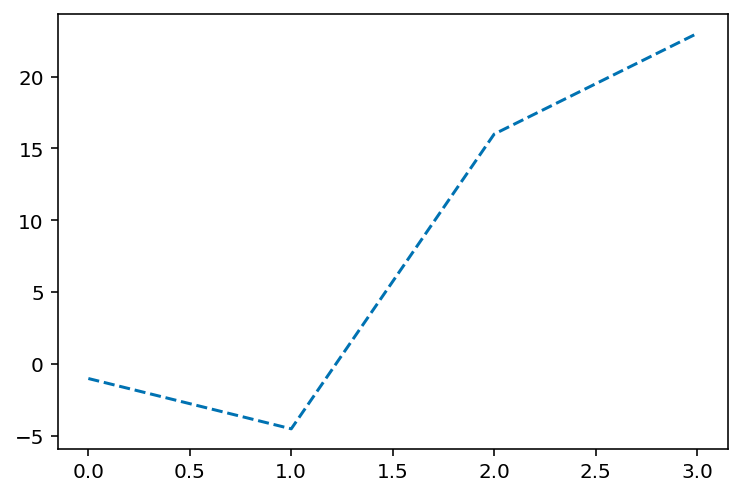

In [24]:
import matplotlib.pyplot as plt
plt.plot([-1, -4.5, 16, 23], "--")
plt.show()

[0, 3, 6, 9, 12, 15, 18, 21]


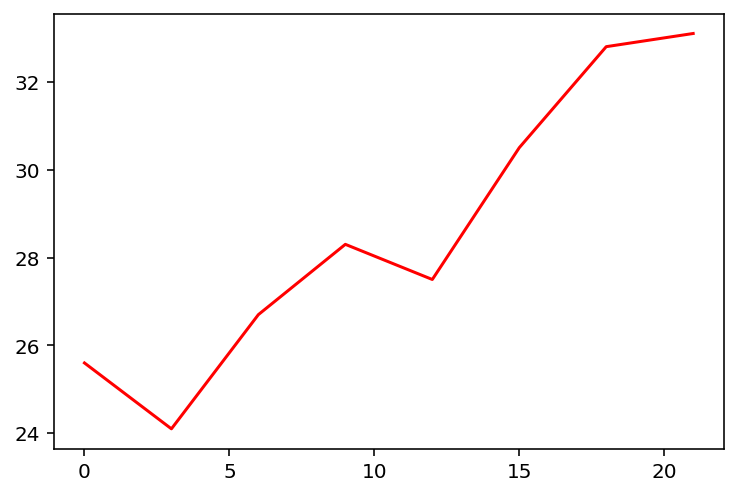

In [25]:
# our X values:
days = list(range(0, 22, 3))
print(days)
# our Y values:
celsius_values = [25.6, 24.1, 26.7, 28.3, 27.5, 30.5, 32.8, 33.1]
plt.plot(days, celsius_values, 'r')
plt.show()

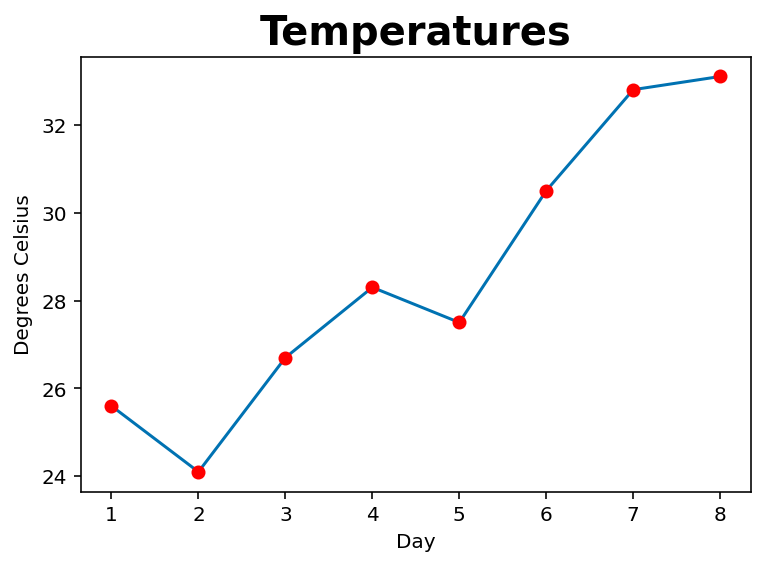

In [26]:
# Labels
import matplotlib.pyplot as plt
days = list(range(1,9))
celsius_values = [25.6, 24.1, 26.7, 28.3, 27.5, 30.5, 32.8, 33.1]

plt.plot(days, celsius_values)
plt.plot(days, celsius_values, "or")

plt.xlabel('Day')
plt.ylabel('Degrees Celsius')
plt.title('Temperatures', fontsize=20, loc='center', fontweight='bold')
plt.show()

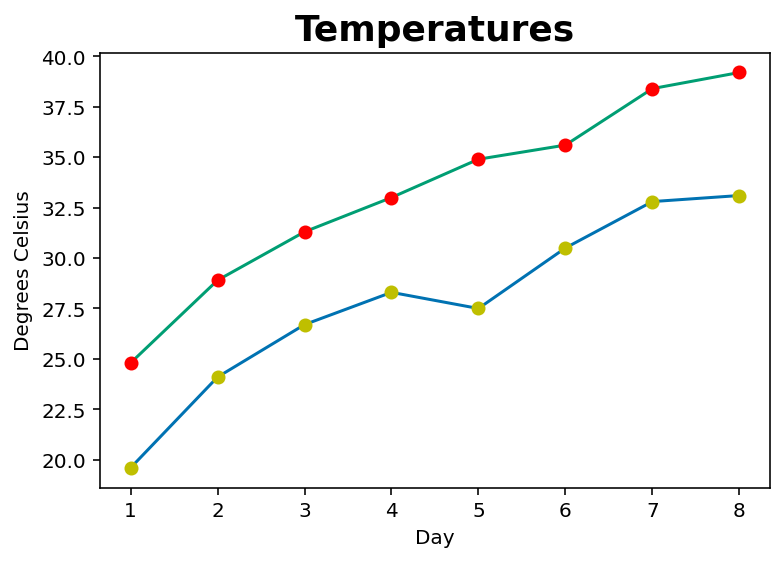

In [27]:
# Orbitary number of 
import matplotlib.pyplot as plt
days = list(range(1,9))
celsius_min = [19.6, 24.1, 26.7, 28.3, 27.5, 30.5, 32.8, 33.1]
celsius_max = [24.8, 28.9, 31.3, 33.0, 34.9, 35.6, 38.4, 39.2]
plt.xlabel('Day')
plt.ylabel('Degrees Celsius')
plt.title('Temperatures', fontsize=18, loc='center', fontweight='bold')
plt.plot(days, celsius_min, 
         days, celsius_min, "oy",
         days, celsius_max,
         days, celsius_max, "or")
plt.show()

In [ ]:
!conda install scipy

In [ ]:
import os
os.getcwd()

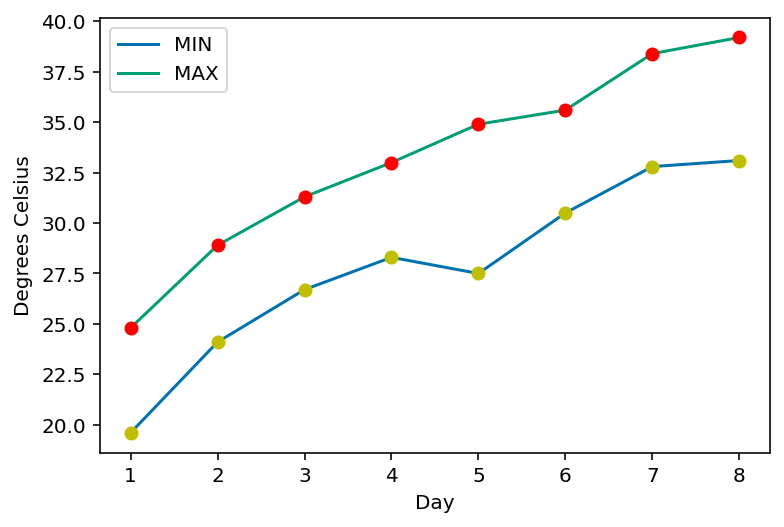

In [31]:
# Orbitary number of 
import matplotlib.pyplot as plt
#from scipy.misc import imread
#import matplotlib.cbook as cbook

days = list(range(1,9))
celsius_min = [19.6, 24.1, 26.7, 28.3, 27.5, 30.5, 32.8, 33.1]
celsius_max = [24.8, 28.9, 31.3, 33.0, 34.9, 35.6, 38.4, 39.2]
plt.xlabel('Day')
plt.ylabel('Degrees Celsius')

#datafile = cbook.get_sample_data('C:\\Users\\naren\\Google Drive\\Working Copy\\world.jpg')
#img = plt.imread(datafile)
#plt.imshow(img, zorder=0)

plt.plot(days, celsius_min, label='MIN')
plt.plot(days, celsius_min, "oy")
plt.plot(days, celsius_max, label='MAX')
plt.plot(days, celsius_max, "or")
plt.legend(loc='best')
plt.show()


<img src='world.jpg'>

In [ ]:
!dir

In [ ]:
import scipy
scipy

Legend positions:

        ===============   =============
        Location String   Location Code
        ===============   =============
        'best'            0
        'upper right'     1
        'upper left'      2
        'lower left'      3
        'lower right'     4
        'right'           5
        'center left'     6
        'center right'    7
        'lower center'    8
        'upper center'    9
        'center'          10
        ===============   =============

__axis(): function__

The current limits for the axes are:
(0.6499999999999999, 8.35, 18.62, 40.18)
We set the axes to the following values:
0 9 14 45


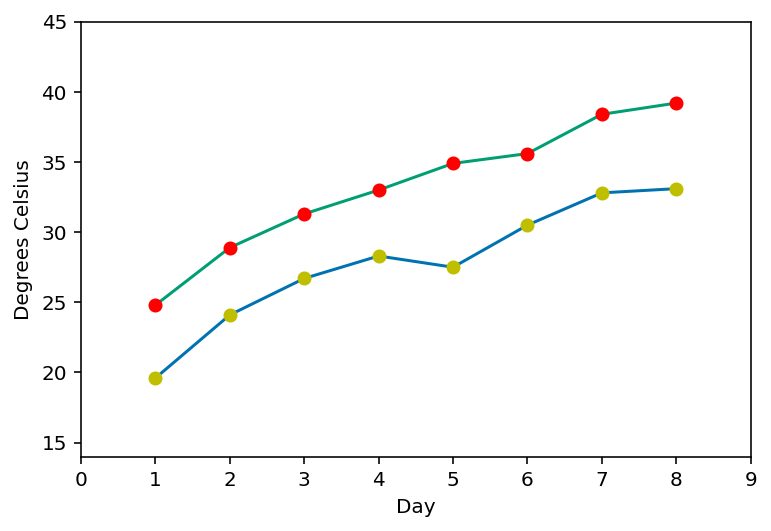

In [32]:
days = list(range(1,9))
celsius_min = [19.6, 24.1, 26.7, 28.3, 27.5, 30.5, 32.8, 33.1]
celsius_max = [24.8, 28.9, 31.3, 33.0, 34.9, 35.6, 38.4, 39.2]
plt.xlabel('Day')
plt.ylabel('Degrees Celsius')
plt.plot(days, celsius_min,
         days, celsius_min, "oy",
         days, celsius_max, 
         days, celsius_max, "or")

print("The current limits for the axes are:")        
print(plt.axis())

print("We set the axes to the following values:")
xmin, xmax, ymin, ymax = 0, 9, 14, 45
print(xmin, xmax, ymin, ymax)
# Setting min, max limits
plt.axis([xmin, xmax, ymin, ymax])
plt.show()

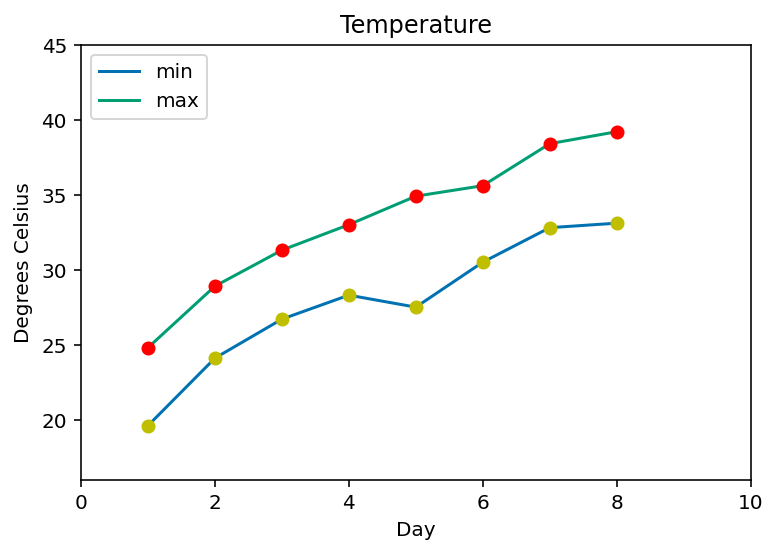

In [33]:
import matplotlib.pyplot as plt
days = list(range(1,9))
celsius_min = [19.6, 24.1, 26.7, 28.3, 27.5, 30.5, 32.8, 33.1]
celsius_max = [24.8, 28.9, 31.3, 33.0, 34.9, 35.6, 38.4, 39.2]
plt.title('Temperature')
plt.xlabel('Day')
plt.ylabel('Degrees Celsius')
plt.plot(days, celsius_min, label='min')
plt.plot(days, celsius_min, "oy")

plt.plot(days, celsius_max, label='max')
plt.plot(days, celsius_max, "or")
#print(plt.axis())
plt.axis([0, 10, 16, 45])
plt.legend(loc='upper left')
plt.show()

In [ ]:
plt.title?

#### "linspace" to Define X Values

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.linspace(0, 15, 100)

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0, 2 * np.pi, 50)
Y = np.sin(X)
plt.plot(X,Y)

plt.show()

#### Changing the Line Style

In [ ]:
import matplotlib.pyplot as plt
X = np.linspace(0, 2 * np.pi, 50, endpoint=True)
F1 = 3 * np.sin(X)
F2 = np.sin(2*X)
F3 = 0.3 * np.sin(X)
F4 = np.cos(X)
plt.plot(X, F1, color="blue", linewidth=2.5, linestyle="-", label='F1')
plt.plot(X, F2, color="red", linewidth=1.5, linestyle="--", label='F2')
plt.plot(X, F3, color="green", linewidth=2, linestyle=":", label='F3')
plt.plot(X, F4, color="grey", linewidth=2, linestyle="-.", label='F4')
plt.legend(loc='best')
plt.show()

### Legends

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(0, 25, 1000)
F1 = np.sin(0.5 * X)
F2 = 3 * np.cos(0.8*X)
plt.plot(X, F1, label="$sin(0.5 * x)$")
plt.plot(X, F2, label="$3 sin(x)$")
plt.legend(loc='upper right')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(0, 25, 1000)
F1 = np.sin(0.5 * X)
F2 = 3 * np.cos(0.8*X)
plt.plot(X, F1, label="$sin(0.5 * x)$")
plt.plot(X, F2, label="$3 sin(x)$")
plt.legend(loc='best')
plt.show()

## Bar Charts and Histograms

Histograms are used to show distributions of variables while 
bar charts are used to compare variables. Histograms plot quantitative data
with ranges of the data grouped into bins or intervals while
bar charts plot categorical data. 


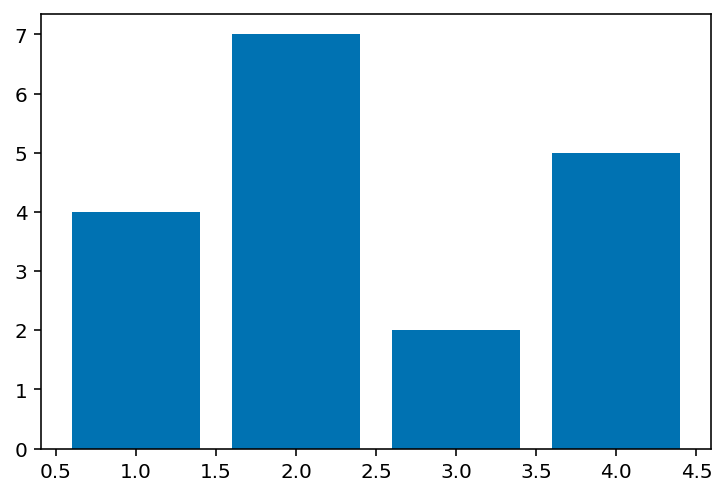

In [35]:
plt.bar([1, 2, 3, 4], [4, 7, 2, 5])
plt.show()

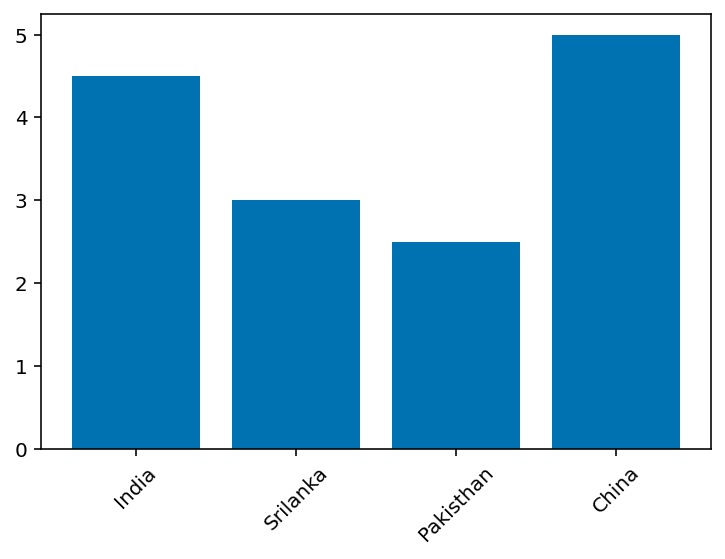

In [39]:
gdps = {"India": 4.5, "Srilanka": 3, "Pakisthan":2.5, "China":5}

countries, gdp = gdps.keys(), gdps.values()
sno = list(range(1, len(countries)+1))
plt.bar(sno, gdp)
plt.xticks(sno, countries, rotation=45)
plt.show()

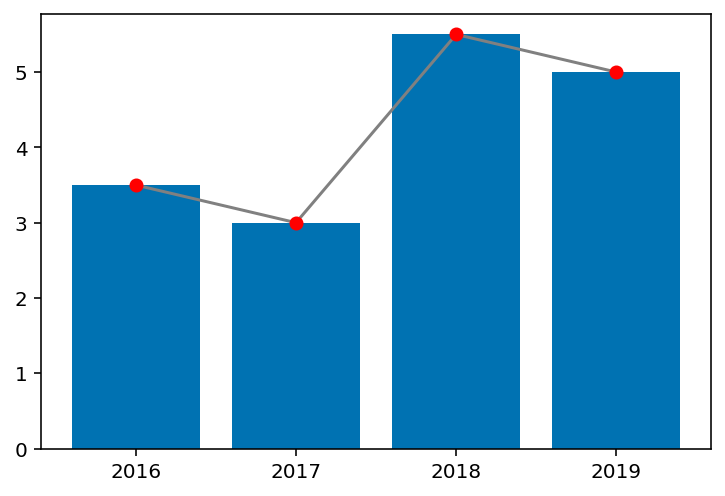

In [42]:
india_gdp = [(2016, 2017, 2018, 2019), (3.5, 3, 5.5, 5)]
year, gdp = india_gdp
plt.bar(year, gdp)
plt.plot(year, gdp, 'grey')
plt.plot(year, gdp, 'or')
plt.xticks(year, ["2016", "2017", "2018", "2019"])
plt.show()

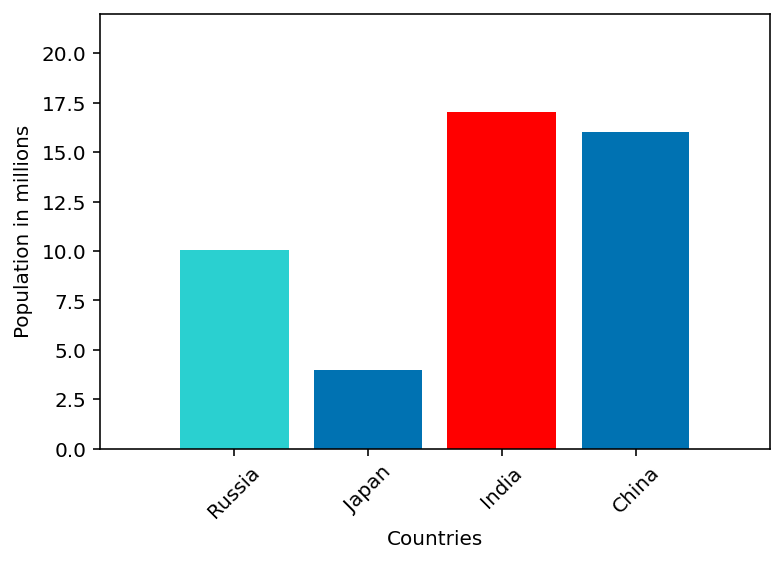

In [43]:
# Grid lines
import numpy as np
import matplotlib.pyplot as plt

y = [10,4,17,16]
x = range(1, len(y)+1)

bars = plt.bar(x, y)

bars[0].set_color('#2AD0D0')
bars[2].set_color('red')

plt.xlabel("Countries")
plt.ylabel("Population in millions")
plt.xticks(x, ('Russia', 'Japan', 'India', 'China'), rotation=45)

plt.axis([0, 5, 0, 22])
plt.show()

In [44]:
import pandas as pd
cities = {"cityname": ["London", "Berlin", "Madrid", "Rome", 
                   "Paris", "Vienna", "Bucharest", "Hamburg", 
                   "Budapest", "Warsaw", "Barcelona", 
                   "Munich", "Milan"],
          
          "population": [1615246,1803425, 3165235, 2874038,
                         1805681,  1760433, 1602386, 1805681,
              
                         1754000, 1805681, 2562166, 1350680, 1803425]
                         
                         
         }
df = pd.DataFrame(cities, index=range(1, len(cities['cityname'])+1))
df

,cityname,population
1,London,1615246
2,Berlin,1803425
3,Madrid,3165235
4,Rome,2874038
5,Paris,1805681
6,Vienna,1760433
7,Bucharest,1602386
8,Hamburg,1805681
9,Budapest,1754000
10,Warsaw,1805681


<AxesSubplot:>

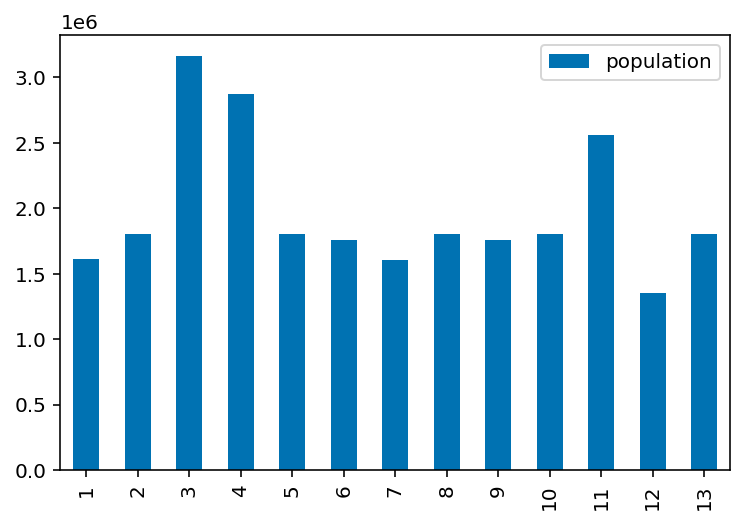

In [45]:
df.plot(kind='bar')

In [ ]:
hex(0x234567)[2:]

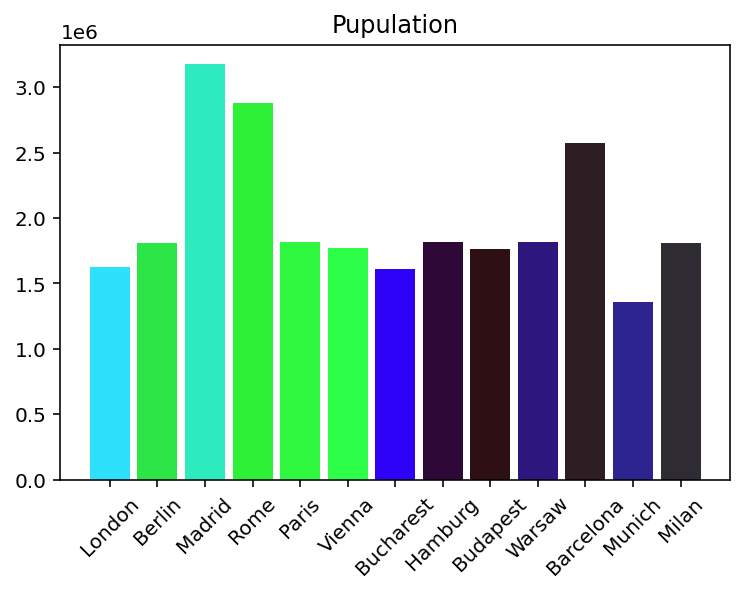

In [49]:
import pandas as pd
import random
bars = plt.bar(df.index, df.population)

base = 0x2DDABB
for bar in bars:
    base += random.choice(range(1000, 2000, 100))
    bar.set_color('#' + hex(base)[2:])
    
plt.xticks(df.index, df.cityname , rotation=45)

#plt.yticks(df['population'].values, df['population'].values)
plt.title('Pupulation')
plt.show()

## Histograms

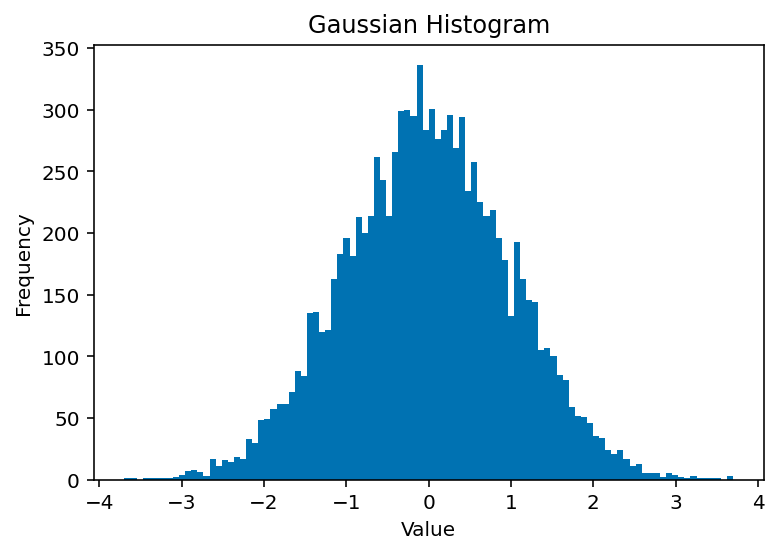

In [52]:
# the next "inline" statement is only needed,
# if you are working with "ipython notebook"
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
gaussian_numbers = np.random.normal(size=10000)
plt.hist(gaussian_numbers, bins=100)

plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

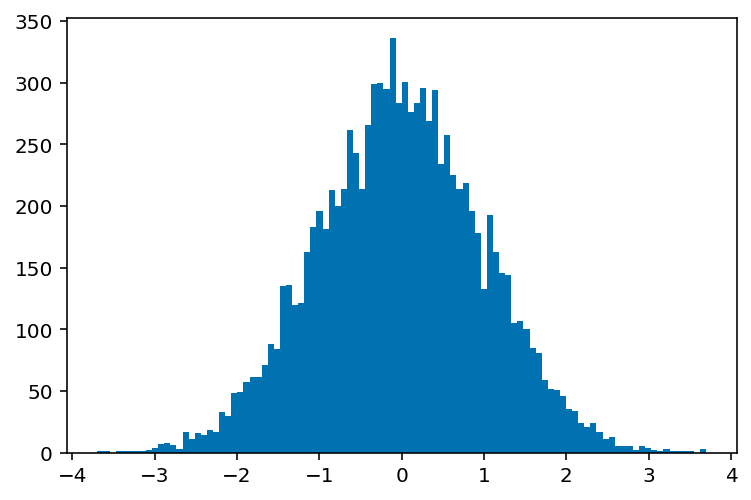

In [53]:
plt.hist(gaussian_numbers, bins=100)
plt.show()

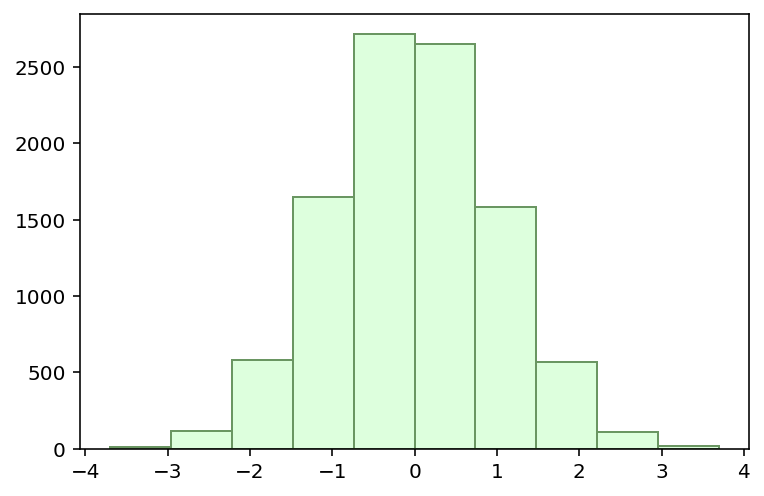

In [55]:
plt.hist(gaussian_numbers, 
         bins=10, 
         edgecolor="#6A9662",
         color="#DDFFDD")
plt.show()

In [ ]:
plt.hist(gaussian_numbers, 
         bins=100, 
         edgecolor="#6A9662",
         color="#DDFFDD",
         cumulative=True)
plt.show()

#### Scatter plot

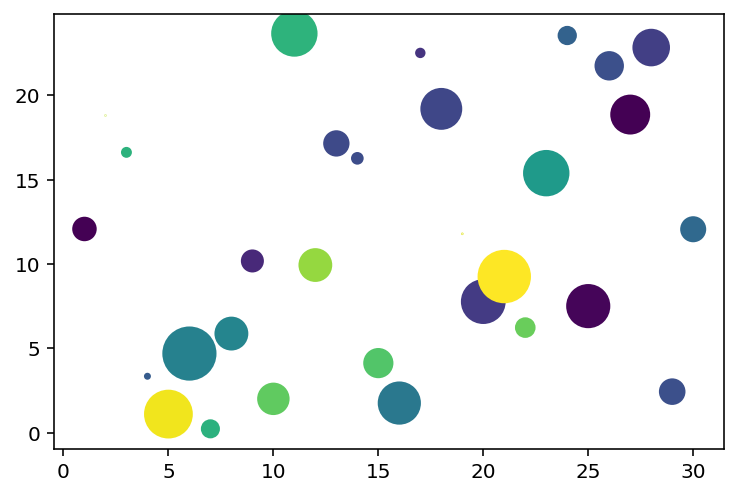

In [58]:
"""
Simple demo of a scatter plot.
"""
import numpy as np
import matplotlib.pyplot as plt

N = 30
x = [x for x in range(1, N+1)] # 
y = (np.random.rand(N)*100)%24

colors = np.random.rand(N)
size = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

#plt.scatter(x, y)
plt.scatter(x, y, size, colors)
plt.show()

#### pie chart

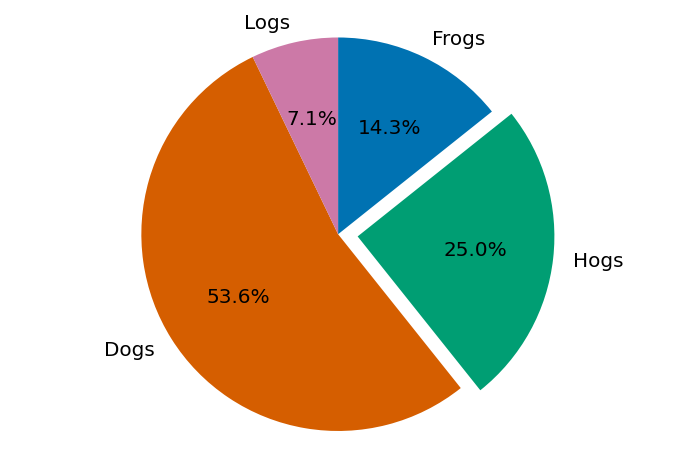

In [64]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [200, 350, 750, 100]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, counterclock=False)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Box plot

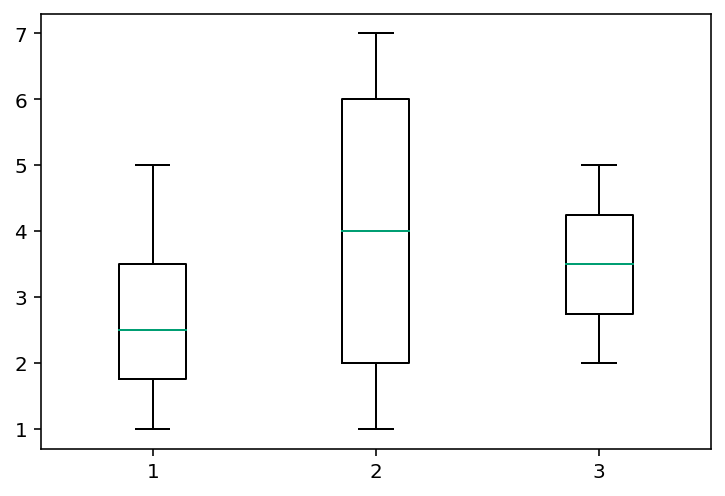

In [65]:
import matplotlib.pyplot as plt
import numpy as np

data2 = [[2, 3, 5, 1], [4, 6, 2, 1, 7], [3, 4, 2, 5]]
bp = plt.boxplot(data2)
plt.show()

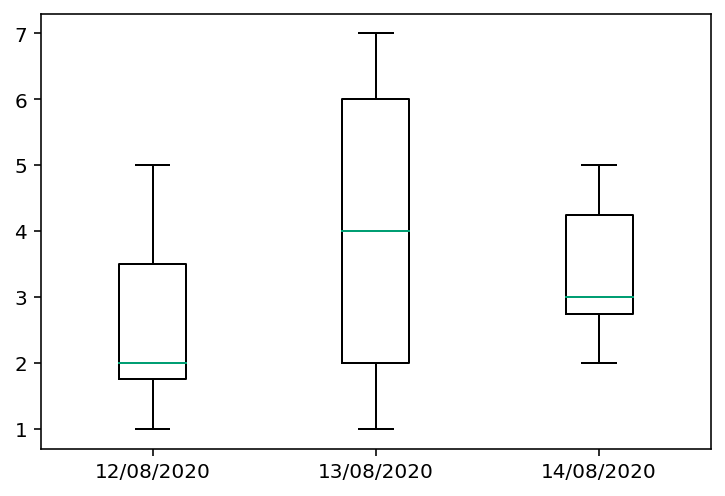

In [74]:
import matplotlib.pyplot as plt
import numpy as np
dates = "12/08/2020", "13/08/2020", "14/08/2020"
data2 = [[2, 3, 5, 1], [4, 6, 2, 1, 7], [3, 4, 2, 5]]
bp = plt.boxplot(data2, usermedians=[2, 4, 3])
    plt.xticks((1,2,3), dates)
plt.show()

Signature:
plt.boxplot(
    x,
    notch=None,
    sym=None,
    vert=None,
    whis=None,
    positions=None,
    widths=None,
    patch_artist=None,
    bootstrap=None,
    usermedians=None,
    conf_intervals=None,
    meanline=None,
    showmeans=None,
    showcaps=None,
    showbox=None,
    showfliers=None,
    boxprops=None,
    labels=None,
    flierprops=None,
    medianprops=None,
    meanprops=None,
    capprops=None,
    whiskerprops=None,
    manage_ticks=True,
    autorange=False,
    zorder=None,
    *,
    data=None,
)
Docstring:
Make a box and whisker plot.

Make a box and whisker plot for each column of *x* or each
vector in sequence *x*.  The box extends from the lower to
upper quartile values of the data, with a line at the median.
The whiskers extend from the box to show the range of the
data.  Flier points are those past the end of the whiskers.

Parameters
----------
x : Array or a sequence of vectors.
    The input data.

notch : bool, default: False
    Whether

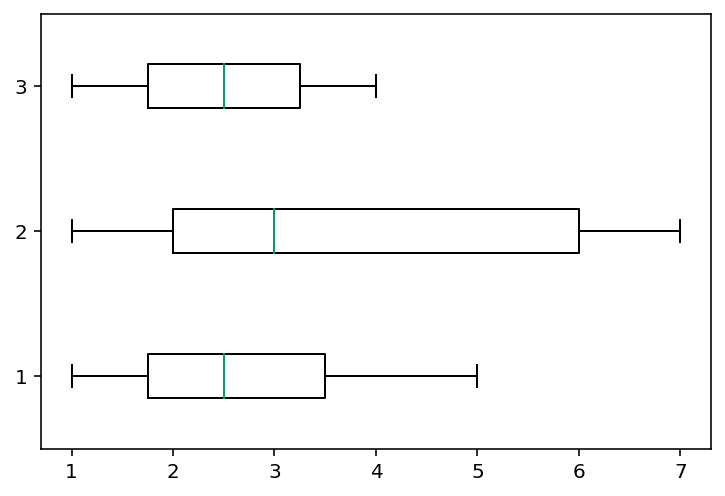

In [67]:
import matplotlib.pyplot as plt
import numpy as np

data2 = [[2, 3, 5, 1], [3, 6, 2, 1, 7], [2, 4, 3, 1]]
bp = plt.boxplot(data2, vert=False)
plt.show()

In [68]:
df = pd.read_excel('random_data.xlsx', 'first_sheet')
df

,a,b,c,d,e
0,-0.802338,0.320195,-0.214568,2.230333,-0.027060
1,2.267877,-0.743297,-2.311221,0.179233,-0.406412
2,-0.070196,0.584466,0.431510,1.732805,-0.267073
3,0.531075,-1.487127,0.273691,-0.319947,0.478294
4,-0.420746,-0.239718,-0.247982,1.603002,-0.581715
5,-1.199864,-1.306763,-0.024545,-0.340462,-0.976180
6,-1.089375,1.554791,0.503428,0.806122,-0.332530
7,-0.014424,1.274560,-0.596137,-0.330260,1.338842
8,0.659830,0.167222,-0.938479,-0.211781,-0.864103
9,-0.935837,0.537139,-0.294713,0.675190,-0.121032


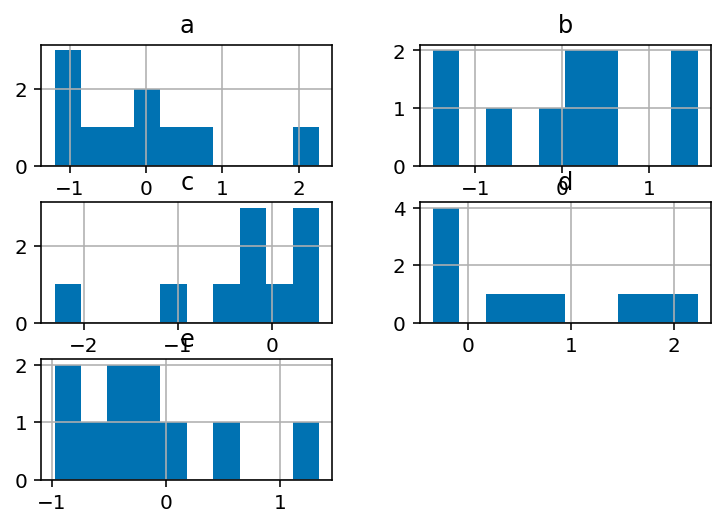

In [69]:
import matplotlib.pyplot as plt
import numpy as np
#data2 = [[2, 3, 5, 1], [3, 6, 2, 1, 7], [2, 4, 3, 1]]
df.hist()
plt.show()

#### Performance

_Creating a large data frame:_

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(10**6, 26),
                  columns=[chr(x) for x in range(65, 65+26)])

_Calculate time taken to save it ti csv:_

In [ ]:
%%timeit
df.to_csv('large_data.csv')

__Reading and writing Chunk by chunk is faster than reading at a time__

In [ ]:
# Reading large csv
tp = pd.read_csv('large_data.csv', iterator=True, chunksize=10000, engine='c', index_col=None)
df = pd.concat(tp, ignore_index=True)
df.head()

In [ ]:
# Writing large csv

In [ ]:
df.to_csv('processed_data.csv', sep=',', chunksize=10000, index=False)

In [ ]:
2 * (2 ** 30)